In [1]:
import os
import cv2
os.chdir('/Users/datanomica/jup_workplace/synth_text_generation')

In [2]:
import random
import numpy as np
import regex as re

seed = 42
random.seed(seed)
np.random.seed(seed)

rus_words = []
with open("words_rus.txt", "r", encoding='cp1251') as fo:
      for line in fo:
        line = re.sub(r'[^А-ЯЁЙа-яёй]', ' ', line)
        line = re.sub(r'\s+', ' ', line).strip()
        if line != '':
          rus_words.append(line.split(' ')[0])
        else:
          continue

eng_words = []
with open("words_eng.txt", "r", encoding='utf8') as fo:
      for line in fo:
        line = re.sub(r'[^A-Za-z]', ' ', line)
        line = re.sub(r'\s+', ' ', line).strip()
        if line != '':
          eng_words.append(line.split(' ')[0])
        else:
          continue
      
random.shuffle(eng_words)
random.shuffle(rus_words)

In [3]:
eng_words[0:10], rus_words[0:10]

(['amygdaloidal',
  'dropsy',
  'instinctually',
  'predetect',
  'Cykana',
  'Jerrold',
  'peize',
  'Valerianella',
  'amusable',
  'unswanlike'],
 ['нагойскою',
  'перекорёженной',
  'поверившего',
  'притоптанной',
  'ухтинца',
  'пароварке',
  'деревопереработкой',
  'психрометры',
  'вкраплявшимся',
  'всемогущественной'])

In [4]:
len(rus_words), len(eng_words)

(1532629, 466547)

In [5]:
eng_chars, rus_chars = ('!"#$%&\'()+,-./0123456789:;=?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]_abcdefghijklmnopqrstuvwxyz«»№',
 '!"#$%&\'()+,-./0123456789:;=?@[]_«»ЁАБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдежзийклмнопрстуфхцчшщъыьэюяё№')

In [6]:
dict_of_same = {'A':'А','B':'Вв','Cc':'Сс','E':'Е',
                'H':'Нн','Kk':'Кк','M':'Мм','Oo':'Оо',
                'Pp':'Рр','T':'Тт','Xx':'Хх','a':'а','e':'е',
                'n':'п','r':'г','y':'у'}

russian_same = ''.join(dict_of_same.values())
english_same = ''.join(dict_of_same.keys())
russian_same,english_same

('АВвСсЕНнКкМмОоРрТтХхаепгу', 'ABCcEHKkMOoPpTXxaenry')

In [8]:
only_end_chars = set(['.',
 ',',
 '-',
 ':',
 ';',
 '!',
 '?',
 ']',
 '='])

only_start_chars = set(['['])

random_characters = [i for i in ".,-:;!?[]/#№$'+@%="]

probs_for_chars = np.logspace(1, 2.5, len(random_characters))[::-1]


def preprocess_word_eng(text):
    text = text.lower()

    random_number = random.choices([0,1,2], weights=[0.33, 0.33, 0.33], k=1)[0]

    if random_number == 0:
      text = text.capitalize()
    if random_number == 1:
      text = text.upper()
    if random_number == 2:
      pass

    return text

def preprocess_word_rus(text):
    text = text.lower()

    random_number = random.choices([0,1,2], weights=[0.33, 0.33, 0.33], k=1)[0]

    if random_number == 0:
      text = text.capitalize()
    if random_number == 1:
      text = text.upper()
    if random_number == 2:
      pass

    return text

def merge_words(list_of_words):

    step_start = 0
    step_end = 0
    new_ls_words = []

    while step_end < len(list_of_words):

        random_end_level = random.choices([1,2,3], weights=[0.89, 0.1, 0.01], k=1)[0]

        if random_end_level == 3:
            random_join = ' '
        else: 
            random_join = random.choices([' ','&','-','_'], weights=[0.3, 0.1, 0.54, 0.06], k=1)[0]

        new_w = f'{random_join}'.join(list_of_words[step_start: step_end + random_end_level])
        new_ls_words.append(new_w)

        step_start = step_end + random_end_level

        step_end = step_start
        
    return new_ls_words

def add_random_attributes(text):
    
    random_number_1 = random.choices([0,1,2], weights=[0.09, 0.11, 0.80], k=1)[0]
    
    if random_number_1 == 0:
    
        random_number_2 = random.choices([0,1,2], weights=[0.40, 0.30, 0.30], k=1)[0]
        if random_number_2 == 0:
            text = random.choices(['«',''])[0] + text + random.choices(['»',''])[0]
        if random_number_2 == 1:
            text = random.choices(['"',''])[0] + text + random.choices(['"',''])[0]
        if random_number_2 == 2:
            text = random.choices(['(',''])[0] + text + random.choices([')',''])[0]
    
    if random_number_1 == 1:
    
        add_symbol = random.choices(random_characters, weights = probs_for_chars, k=1)[0]
        
        random_position = random.choices([0,1], weights = [0.5,0.5], k=1)[0]
        
        if random_position == 0:
            if add_symbol in only_end_chars:
                text =  text + add_symbol  
            else:
                text = add_symbol + text
        if random_position == 1:
            if add_symbol in only_start_chars:
                text = add_symbol + text
            else:
                text = text + add_symbol    
            
    return text

In [9]:
additional_eng_words = []
for word in eng_words[0:]:
    word = preprocess_word_eng(word)
    if len(set([i for i in word]) & set([i for i in english_same])) > random.choices([1,2,3,4,5,6])[0]:
        additional_eng_words.append(word)
    else:
        continue

In [10]:
len(additional_eng_words)

196220

In [11]:
eng_words = additional_eng_words[0:150000] #eng_words[0:60000]
rus_words = rus_words[0:150000]

In [12]:
seed = 42
random.seed(seed)
np.random.seed(seed)

eng_words = [preprocess_word_eng(i) for i in eng_words]
rus_words = [preprocess_word_rus(i) for i in rus_words]

eng_words = merge_words(eng_words)
rus_words = merge_words(rus_words)

random.shuffle(eng_words)
random.shuffle(rus_words)

len(rus_words), len(eng_words)

(133988, 133787)

In [13]:
def get_random_number():
    
    random_level = random.choices([1,2,3,4,5], weights=[0.2, 0.2, 0.2, 0.2, 0.2], k=1)[0]
    
    if random_level == 1:
        final_number = str(random.randint(1,15)) + random.choices(['.','',','])[0]
        
    if random_level == 2:
        final_number = str(random.randint(1,15)) + '.' + str(random.randint(1,40)) + random.choices(['.','',','])[0]
    
    if random_level == 3:
        final_number = str(random.randint(1,15)) + '.' + str(random.randint(1,40)) + '.' + str(random.randint(1,30)) + random.choices(['.','',','])[0]
        
    if random_level == 4:
        final_number = str(random.randint(1,15)) + '.' + str(random.randint(1,40)) + '.' + str(random.randint(1,30)) + '.' + str(random.randint(1,40)) + random.choices(['.','',','])[0]
        
    if random_level == 5: #random date
        final_number = str(random.randint(1,31)) + '.' + str(random.randint(1,12)) + '.' + str(random.randint(1900,2023))
        
    return final_number

In [14]:
def get_arbitrary_rus_word():

    len_of_word = random.randint(2,13)

    random_word = ''.join([random.choice(rus_chars) for i in range(len_of_word)])
    
    return random_word

def get_arbitrary_eng_word():
    
    len_of_word = random.randint(2,13)

    random_word = ''.join([random.choice(eng_chars) for i in range(len_of_word)])
        
    return random_word

In [15]:
get_arbitrary_rus_word()

'ЪЫ?жмй»'

In [16]:
seed = 42
random.seed(seed)
np.random.seed(seed)

random_nums_1 = [str(i) for i in range(0,2500)]
random_nums_2 = [get_random_number() for i in range(0,5000)]
random_numbers = random_nums_2 + random_nums_1

arbitrary_rus_words = [get_arbitrary_rus_word() for i in range(0,2500)]
arbitrary_eng_words = [get_arbitrary_eng_word() for i in range(0,2500)]

In [17]:
seed = 42
random.seed(seed)
np.random.seed(seed)

eng_words = [add_random_attributes(i) for i in eng_words] + [i for i in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'] * 90 + random_numbers + arbitrary_eng_words
rus_words = [add_random_attributes(i) for i in rus_words] + [i for i in '-,.;№123456789'] * 360 + [i for i in 'ЁАБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдежзийклмнопрстуфхцчшщъыьэюяё'] * 100 + arbitrary_rus_words

random.shuffle(eng_words)
random.shuffle(rus_words)

In [18]:
len(eng_words), len(rus_words)

(148467, 148128)

In [19]:
len_eng = []
len_rus = []

for word in eng_words:
    len_eng.append(len(word))
for word in rus_words:
    len_rus.append(len(word))

np.mean(len_rus), np.std(len_rus), np.mean(len_eng), np.std(len_eng)

(11.53469296824368, 5.969713038168201, 10.759825415748955, 5.393365279095867)

In [20]:
eng_words[0:10], rus_words[0:10]

(['Amylogens',
  'Unplacement',
  'folcgemot',
  'Worths.',
  'INCUBEE',
  'Nontyrannous',
  'STONEPECKER',
  'Heartblood',
  '"phonatory"',
  'napoleonana'],
 ['цитогенетика',
  'Растоплены',
  'Обезлиствить',
  'онемечивал;',
  'ПРИГОТОВЛЯВШЕЙСЯ&жизненнее',
  '9',
  'превозмочь',
  'о',
  'заулыбается',
  'биополимерам'])

In [24]:
eng_chars = {}
for word in eng_words:
  for char in word:
    eng_chars[char] = eng_chars.get(char, 0) + 1

rus_chars = {}
for word in rus_words:
  for char in word:
    rus_chars[char] = rus_chars.get(char, 0) + 1

In [25]:
eng_chars_ = ''.join(sorted(eng_chars.keys()))

In [26]:
rus_chars_ = ''.join(sorted(rus_chars.keys()))

In [27]:
eng_chars_, rus_chars_

(' !"#$%&\'()+,-./0123456789:;=?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]_abcdefghijklmnopqrstuvwxyz«»№',
 ' !"#$%&\'()+,-./0123456789:;=?@[]_«»ЁАБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдежзийклмнопрстуфхцчшщъыьэюяё№')

In [28]:
seed = 42
random.seed(seed)
np.random.seed(seed)

eng_and_rus_words = eng_words + rus_words

random.shuffle(eng_and_rus_words)

In [29]:
len(eng_and_rus_words)

296595

In [30]:
eng_and_rus_words[0:40]

['(TOOL',
 'Интерпретирую',
 'Ч',
 'hulsean',
 'encaustic',
 'unaffectionately',
 'antidisestablishmentarian',
 'прошнуровываемом',
 'ROSELINE',
 'WAREHOUSING',
 'Откупоривавшеюся',
 'Zinjanthropus',
 'SEPTEMFOLIATE,',
 'jobarbe',
 'ZOOMORPHIC',
 'локомобильный',
 'перенервничавшие',
 'втолкованное',
 'ВОЗГЛАВИВШИХ',
 'жертвующих',
 'Hexamer',
 'configuration',
 'P',
 'SUBSTOCK',
 'ЗАСЛЫШАТЬ-макрокосму,',
 'Спиртною Задраивших]',
 'COMPLOTMENT',
 'Ноток',
 'эритроците',
 'THUMB',
 'Одухотвориться',
 'МАССОЗАГОТОВИТЕЛЬНОЙ',
 'Намаравшему',
 'BYRONICS',
 'ПОДГРУДНОМ',
 'исколотившим.',
 '15.9,',
 '730',
 'припудрившее',
 'я=я[Ш-Ч']

In [31]:
with open("NETOLOGY_eng_and_rus_words.txt", "w", encoding='utf8') as fo:
    for s in eng_and_rus_words:
        fo.write(str(s) + "\n")

In [33]:
w_lens = []
for w in eng_and_rus_words:
    w_lens.append(len(w))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


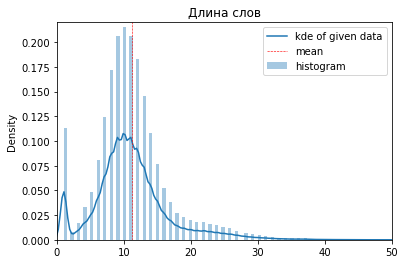

In [42]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.distplot(w_lens, bins = 110, kde_kws={'label':'kde of given data'}, label = 'histogram')
plt.axvline(np.mean(w_lens), color='r', linestyle='dashed', linewidth=0.6, label = 'mean')
plt.title('Длина слов', fontdict = {'fontsize' : 12})
plt.axis([0, 50, 0, 0.22])
plt.legend(loc = 1, prop={'size': 10})
plt.show()